In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm
os.chdir('../')
from python_code import gradient_descent as gd
from scipy.stats import binom
import matplotlib.style as style
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
style.use('ggplot')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
betas = np.array([-0.5,-0.5])
num_points = 1000
X = np.ones((num_points, len(betas)))
X[:,1] = np.random.uniform(-10, 10, size=num_points)
p = 1 / (1 + np.exp(-X@betas.reshape(-1, 1)))
y = binom.rvs(1, p).flatten()


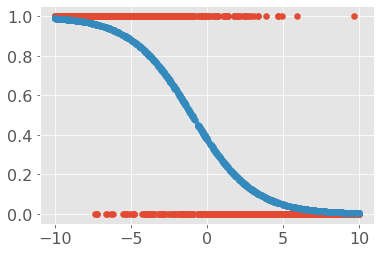

In [3]:
plt.scatter(X[:,1], y)
plt.scatter(X[:,1], p);


In [4]:
beta_1 = np.linspace(-3, 3,100)
beta_2 = np.linspace(-3,3,100)
bb_1, bb_2 = np.meshgrid(beta_1, beta_2)
betas = np.vstack((bb_1.flatten(), bb_2.flatten()))


In [5]:
fitter = gd.LogisticRegression(fit_intercept=True)
fitter.fit(X[:,1].reshape(-1,1), y)


  1%|█▏                                                                                                                                                                                                   | 49/8000 [00:00<00:01, 6183.68it/s]


'tolerance achieved'

In [6]:
logs = []
for i in range(betas.shape[1]):
    log_likes = fitter._calculate_log_likelihood(y, X@betas[:,i])
    logs.append(log_likes)
    y_pred = fitter._get_mu(X@betas[:,i])
    

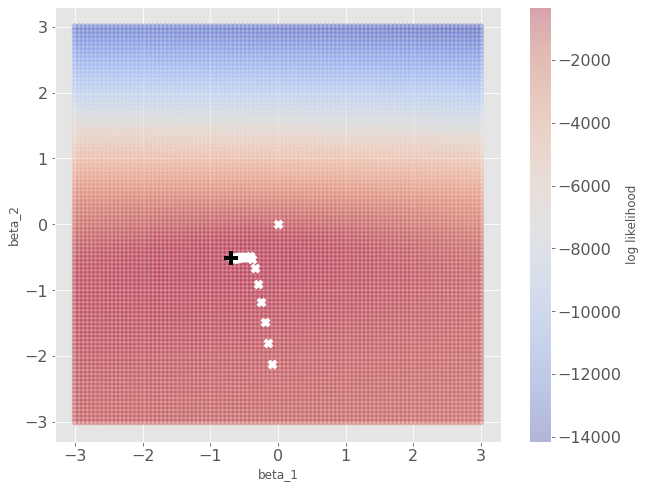

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(betas[0,:], betas[1,:], c=np.array(logs) ,cmap='coolwarm', alpha=.3)
cbar = plt.colorbar()
cbar.set_label('log likelihood')
for beta in fitter.betas_it:
    plt.scatter(beta[0],beta[1], color='white', marker='x',s=50)
plt.scatter(betas[0,:][np.argmax(np.array(logs))], betas[1,:][np.argmax(np.array(logs))],color='black',s=200, marker='+', label='max likelihood')
#plt.legend()   
plt.xlabel('beta_1')
plt.ylabel('beta_2');


In [8]:
data = pd.read_csv('../data/wdbc.csv', header=None)
data.iloc[:,1] = (data.iloc[:,1] == 'M').astype(int)


In [9]:
data


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
X = np.array(data.iloc[:,2:13])
y = np.array(data.iloc[:,1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
fitter = gd.LogisticRegression(fit_intercept=False, learning_rate=0.0000001, max_iteration = 10000000)
fitter.fit(X_train, y_train)
y_pred = fitter.predict(X_test)


  0%|                                                                                                                                                                                                            | 0/10000000 [00:00<?, ?it/s]/Users/juliette/Documents/repos/SDS383D_JF/exercises-02/python_code/gradient_descent.py:134: RuntimeWarning: divide by zero encountered in log
  LL = np.sum(y @ np.log(mu) + (1 - y) @ np.log(1 - mu))
/Users/juliette/Documents/repos/SDS383D_JF/exercises-02/python_code/gradient_descent.py:134: RuntimeWarning: invalid value encountered in matmul
  LL = np.sum(y @ np.log(mu) + (1 - y) @ np.log(1 - mu))
  0%|▍                                                                                                                                                                                            | 21028/10000000 [00:01<14:03, 11831.04it/s]


In [15]:
fitter.betas

array([-0.06353801,  0.10699745, -0.18669257,  0.02463311,  0.00094226,
        0.00604671,  0.0085691 ,  0.00372392,  0.00141036,  0.00019091,
        0.00862781])

In [16]:
clf = LogisticRegression(fit_intercept=False)
clf.fit(X_train, y_train)
clf.coef_

array([[-4.30552399,  0.18097351,  0.43835006,  0.02522965,  0.18116749,
         0.83346831,  1.11416519,  0.48704756,  0.27745903,  0.06329884,
         1.05987991]])

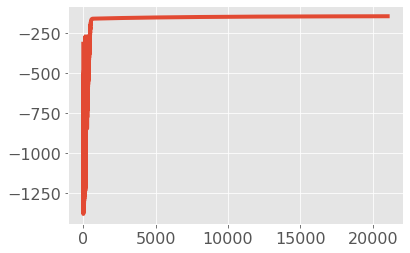

In [17]:
plt.plot(fitter.log_likelihood)

In [34]:
accuracy_score(y_test, y_pred)


0.8947368421052632

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)


In [14]:
#try linear regression
from scipy.stats import norm
slope, intercept = 2,2
X = np.linspace(0,10,100)
y = slope*X + intercept + norm(0,1).rvs(100) 


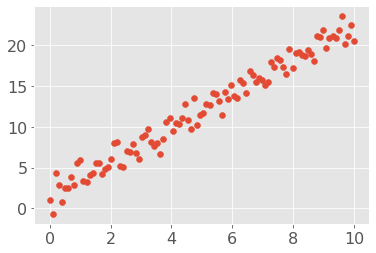

In [15]:
plt.scatter(X, y)


In [16]:
lr=gd.LinearRegression(fit_intercept=True, learning_rate = 0.000001, max_iteration=1000000)
lr.fit(X.reshape(-1,1), y)


 15%|███████████████████████████▊                                                                                                                                                              | 149831/1000000 [00:02<00:13, 64972.98it/s]


'tolerance achieved'

In [17]:
lr.betas


array([1.58640947, 2.08590419])

In [18]:
num_points = 100
beta_1 = np.linspace(-5, 5, num_points)
beta_2 = np.linspace(-5, 5, num_points)
bb_1, bb_2 = np.meshgrid(beta_1, beta_2)
betas = np.vstack((bb_1.flatten(), bb_2.flatten()))


In [19]:
X = np.linspace(0,10,100)
column_ones = np.ones_like(X)
X = np.vstack((column_ones, X)).T
logs = []
for i in range(betas.shape[1]):
    log_likes = lr._calculate_log_likelihood(y, X@betas[:,i])
    logs.append(log_likes)
    

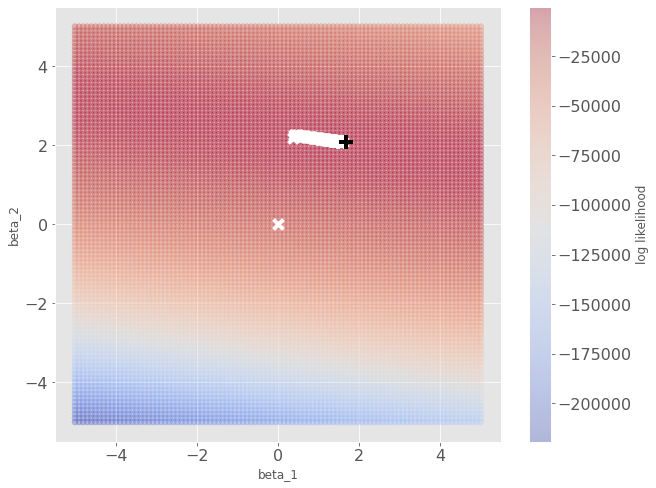

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(betas[0,:], betas[1,:], c=np.array(logs) ,cmap='coolwarm', alpha=.3)
cbar = plt.colorbar()
cbar.set_label('log likelihood')
for i,beta in enumerate(lr.betas_it):
    if i % 1000 == 0:
        plt.scatter(beta[0],beta[1], color='white', marker='x',s=100)
plt.scatter(betas[0,:][np.argmax(np.array(logs))], betas[1,:][np.argmax(np.array(logs))],color='black',s=200, marker='+', label='max likelihood')
#plt.legend()   
plt.xlabel('beta_1')
plt.ylabel('beta_2');